In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from torch import optim
import torch
import numpy as np

# Dataset

In [3]:
from dataset import get_pytorch_datataset, BATCH_SIZE

df_returns_real, dataset, dataloader, N_ASSETS, WINDOW_SIZE = get_pytorch_datataset()

print(f'\nDataset length: {len(dataset)}')
print(f'Number of assets: {N_ASSETS}')
sample_batch = next(iter(dataloader))
assert sample_batch.size() == (BATCH_SIZE, N_ASSETS, WINDOW_SIZE)
print(f'Sample batch: {sample_batch.size()}')

Chosen tickers: ['SBER', 'SBERP', 'LKOH', 'VTBR', 'MOEX']
Length before dropping NaNs: 2603
Length after dropping NaNs: 2577

Dataset length: 2451
Number of assets: 5
Sample batch: torch.Size([256, 5, 126])


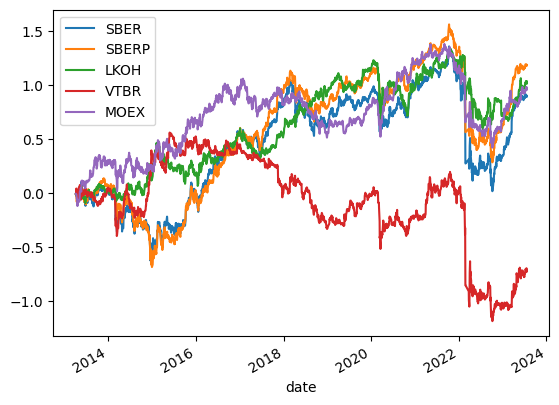

In [4]:
df_returns_real.cumsum().plot()
plt.show()

# GAN


In [6]:
from constants import DEVICE

print(f'Use device: {DEVICE}')

Use device: cpu


In [7]:
from gan import Discriminator, Generator

assert Discriminator()(next(iter(dataloader))).size() == (BATCH_SIZE,)
assert Generator()(Generator.get_noise(BATCH_SIZE)).size() == next(iter(dataloader)).size()

C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


In [7]:
def print_weight_stats(model, name):
    params = [p.data.abs().mean() for p in model.parameters()]
    print(f"{name} mean |weight|: {torch.tensor(params).mean():.4f}")

discriminator = Discriminator().to(DEVICE)
generator = Generator().to(DEVICE)
print_weight_stats(generator, "Generator")
print_weight_stats(discriminator, "Discriminator")

Generator mean |weight|: 0.2606
Discriminator mean |weight|: 0.2603


## Train

In [8]:

all_generator_losses = {}
all_discriminator_losses_real = {}
all_discriminator_losses_fake = {}

all_avg_corr = {}

In [9]:

import pickle
def add_to_dict(metric, new_info=None):
    filename = './metrics' + f'/{metric}.pkl' 
    try:
        with open(filename, 'rb') as f:
            loaded_dict = pickle.load(f)
        if new_info is None:
            return loaded_dict
        new_dict = loaded_dict | new_info
    except:
        with open(filename, 'wb') as f:
            pickle.dump(new_info, f)
        return new_info
            
    with open(filename, 'wb') as f:
        pickle.dump(new_dict, f)
    return new_dict


  0%|          | 0/800 [00:00<?, ?it/s]

200 epochs train time: 208.6s. Estimated train time: 10.4m
tensor(0.0197)
Fake std: [0.25376847 0.35269937 0.34994942 0.21661112 0.27419952].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.04381318346361331. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


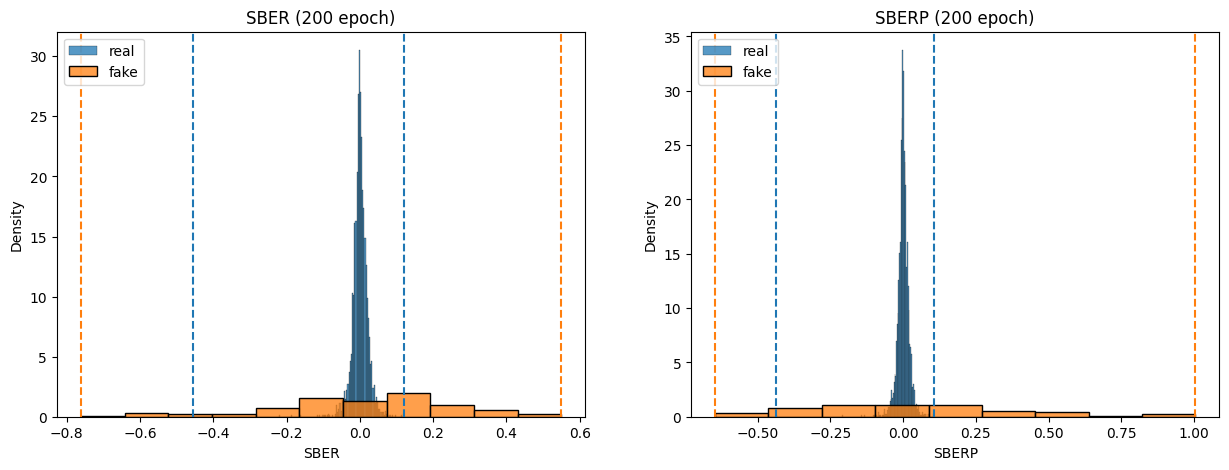

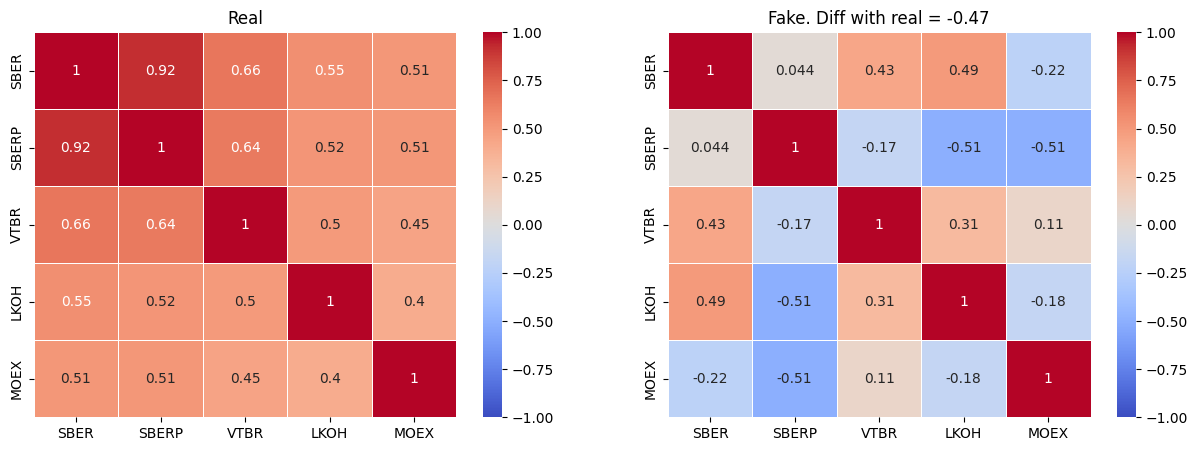

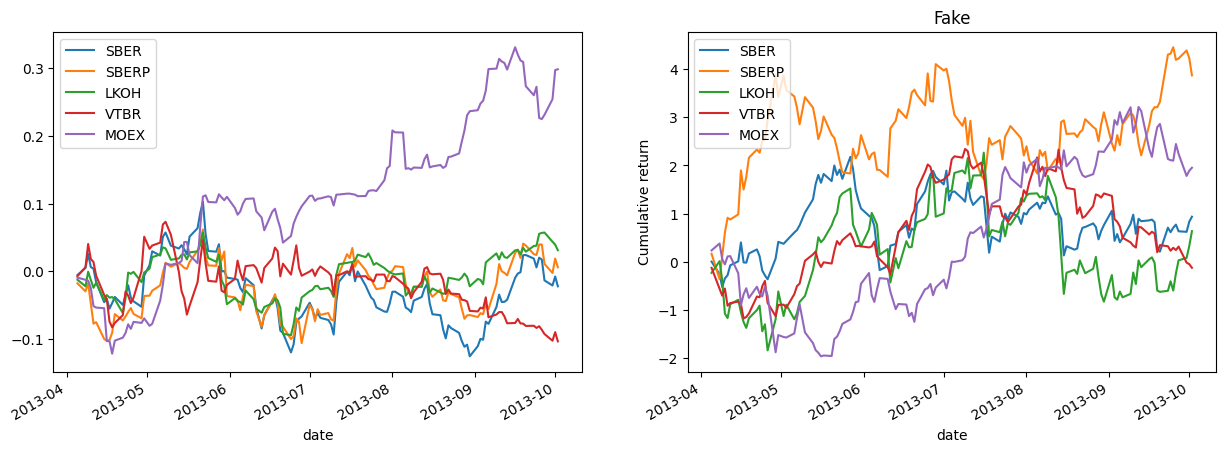

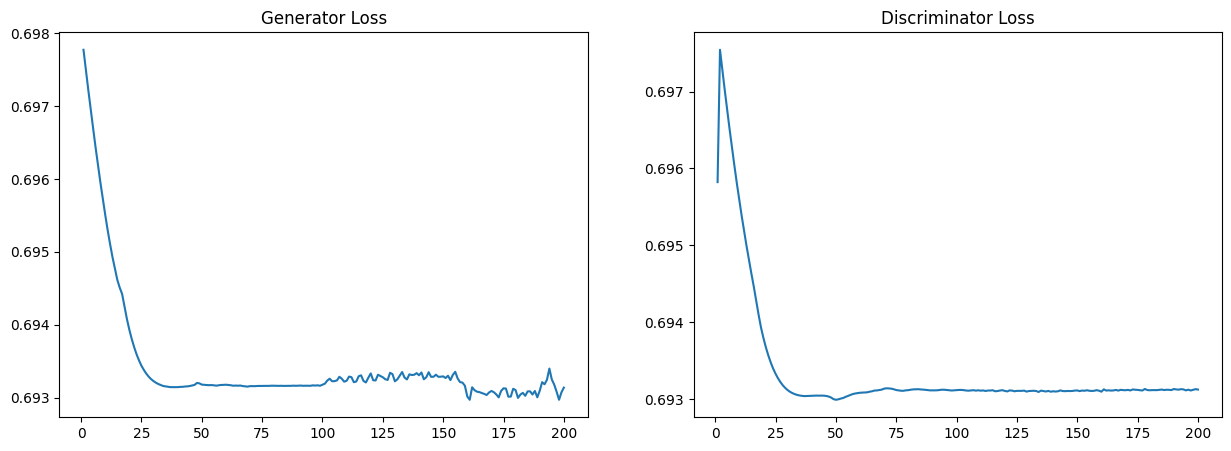

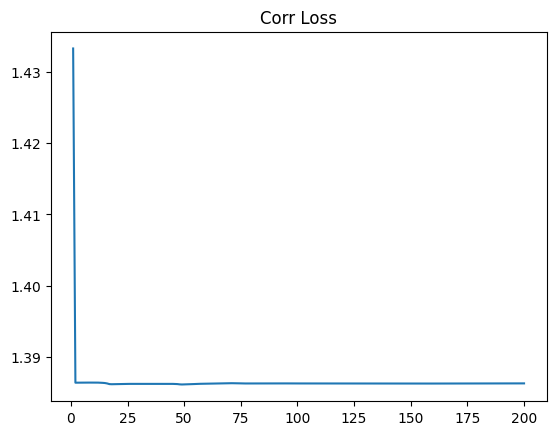

200 epochs train time: 371.4s. Estimated train time: 12.4m
tensor(-0.0214)
Fake std: [0.03709606 0.04289712 0.04155843 0.04042124 0.02729281].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.622496520135304. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


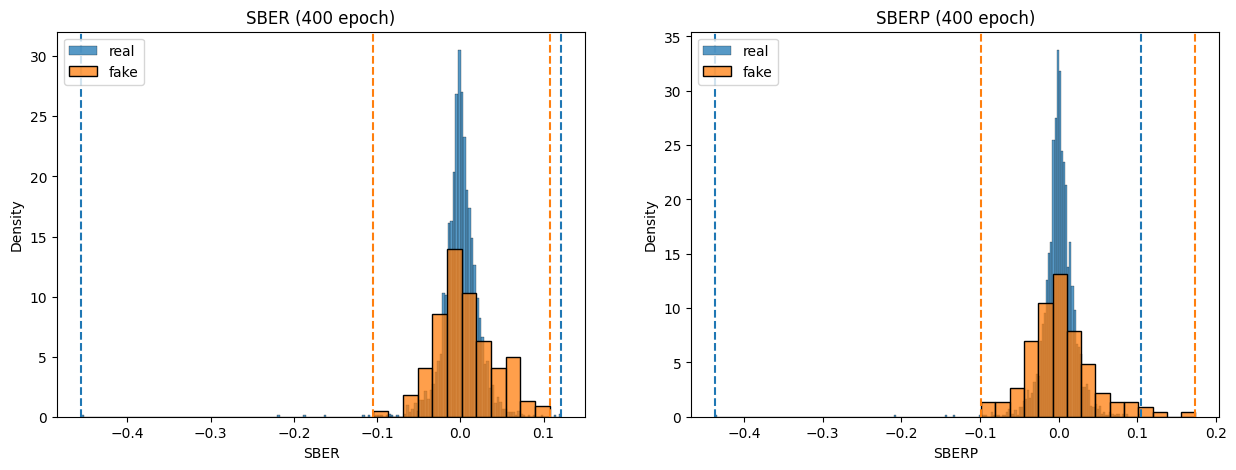

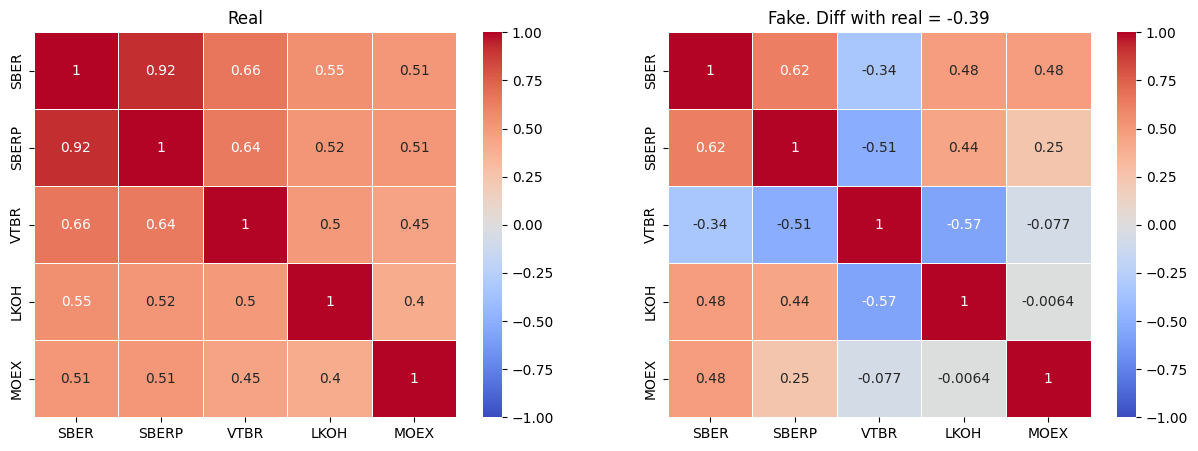

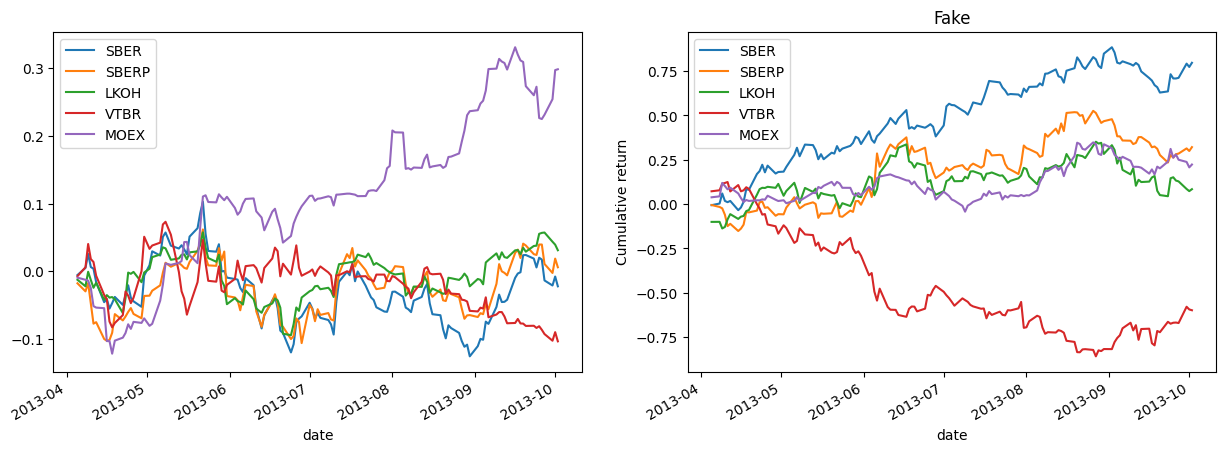

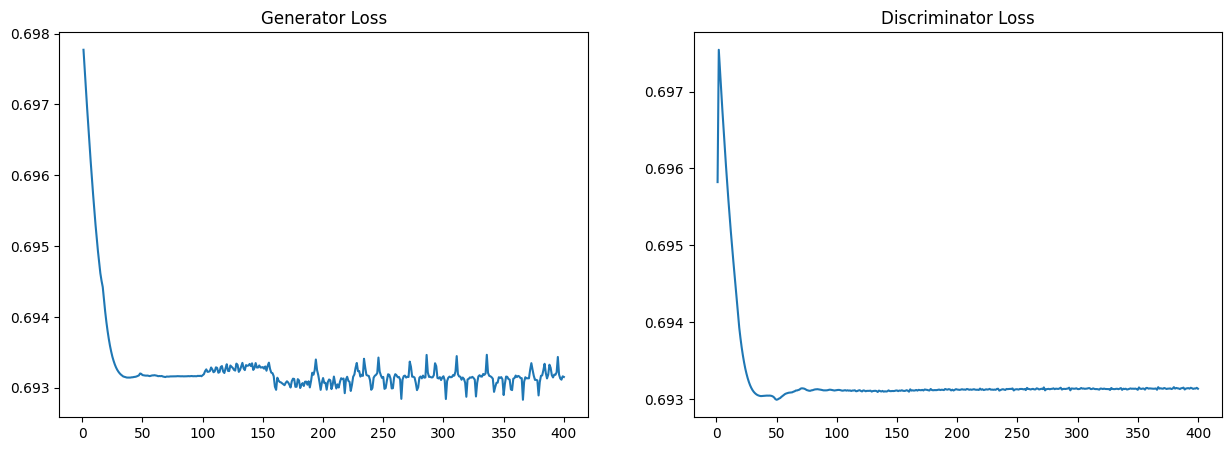

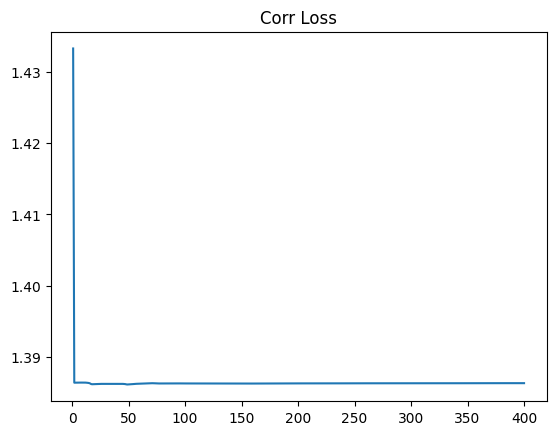

200 epochs train time: 409.4s. Estimated train time: 6.8m
tensor(0.0232)
Fake std: [0.01878536 0.01636642 0.01460415 0.01639364 0.01557493].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8441556401938781. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


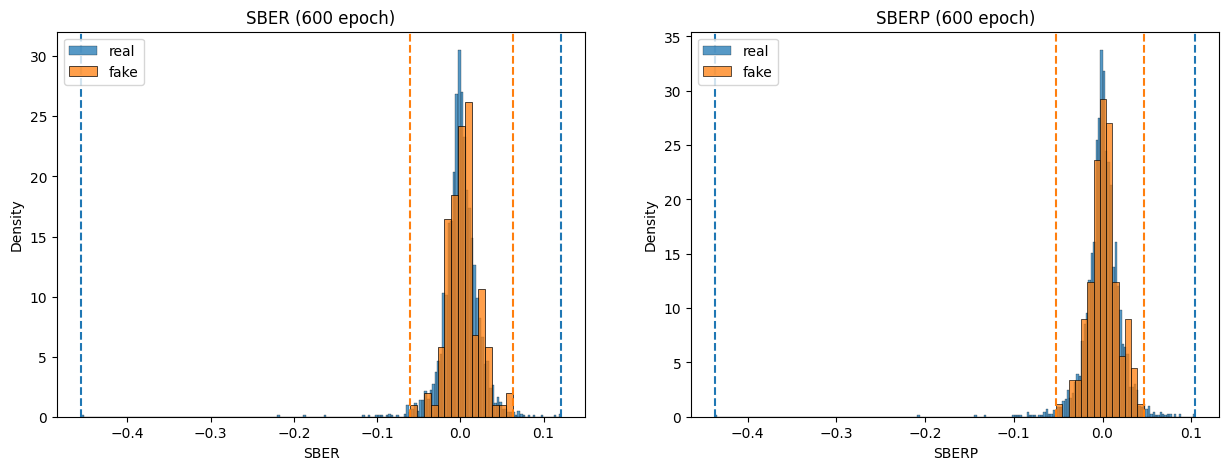

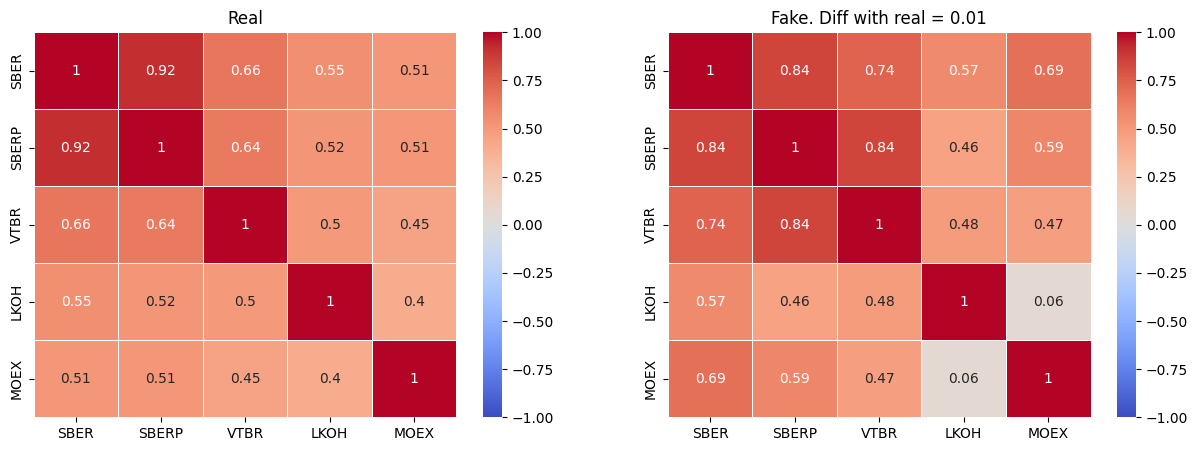

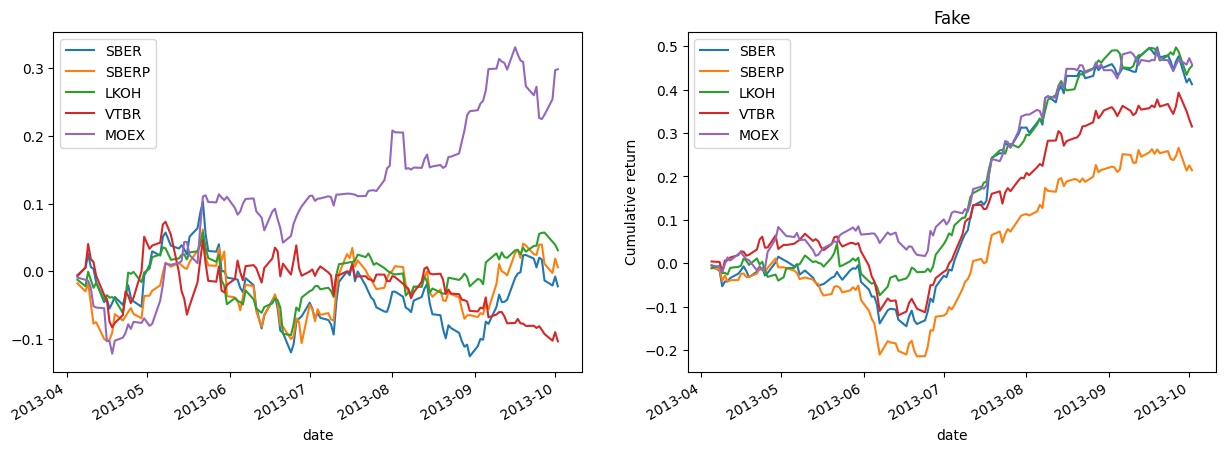

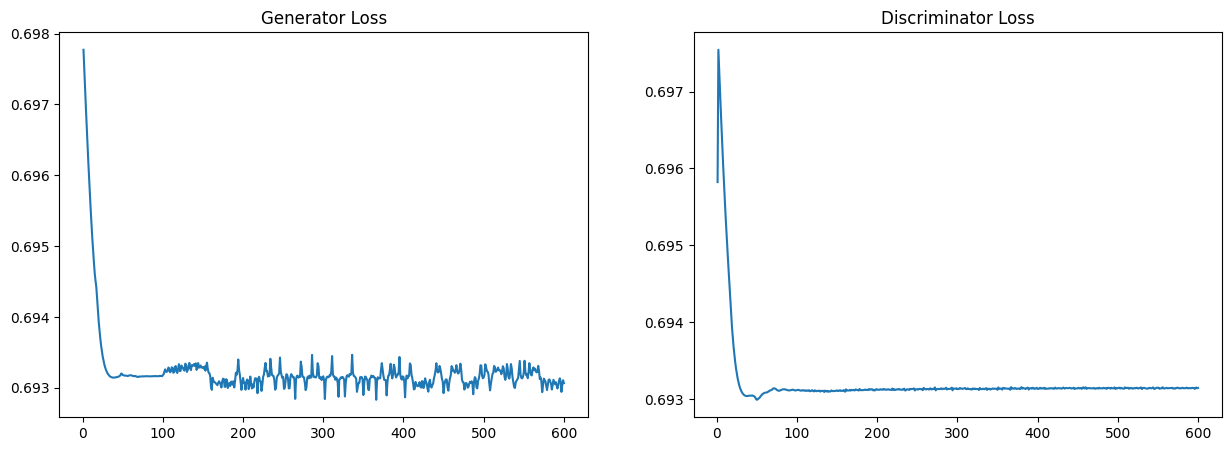

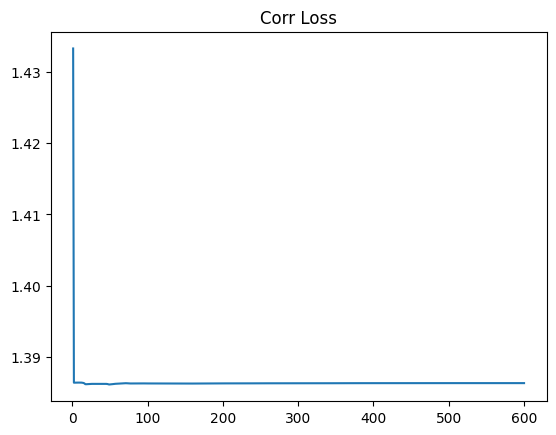

200 epochs train time: 312.5s. Estimated train time: 0.0m
tensor(0.0159)
Fake std: [0.01794505 0.0157957  0.01499493 0.01510145 0.01277209].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8448834613779178. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


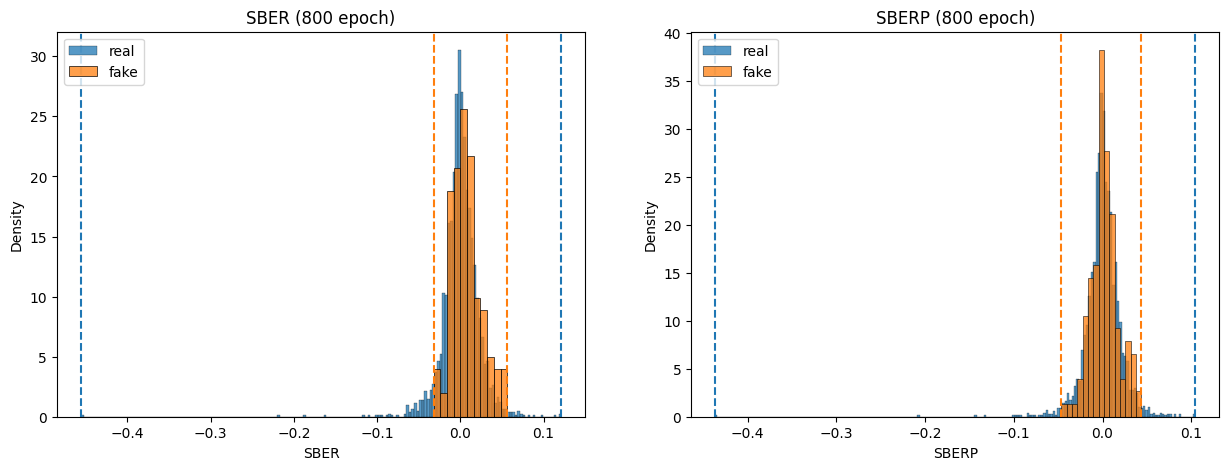

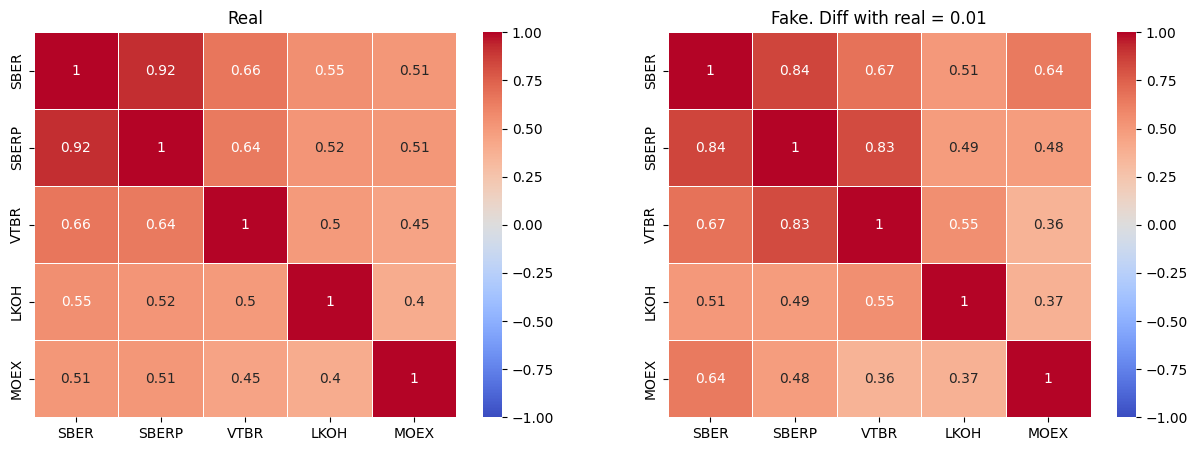

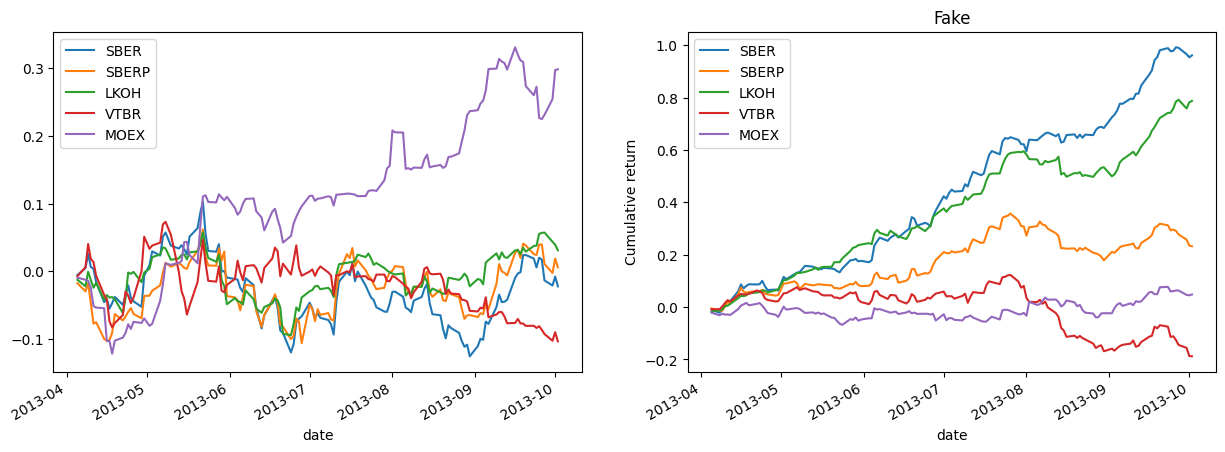

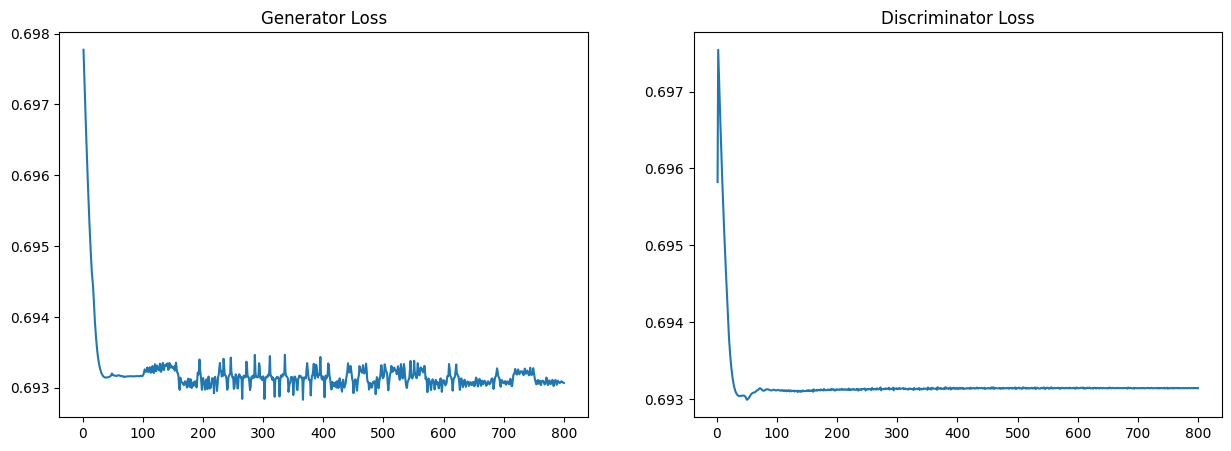

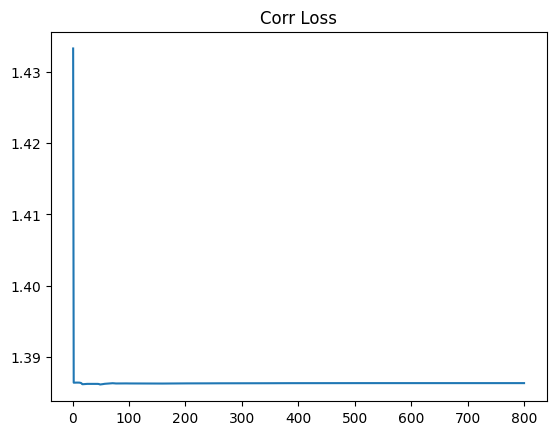

In [27]:
from gan_train_loop import train_gan

N_EPOCHS = 800
LOG_FREQUENCY = 200
SAVE_FREQUENCY = 200

torch.manual_seed(1) # фиксим рандомайзеры

for kernel_size in [2]:
    # Define generator and discriminator
    discriminator = Discriminator().to(DEVICE)
    generator = Generator(kernel_size).to(DEVICE)
    
    # Define the optimizers for generator and discriminator
    LR = 0.0002
    generator_optimizer = optim.RMSprop(generator.parameters(), lr=LR)
    discriminator_optimizer = optim.RMSprop(discriminator.parameters(), lr=LR)
    # Train GAN
    generator_losses, discriminator_losses_real, discriminator_losses_fake = train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, dataloader, df_returns_real, n_epochs=N_EPOCHS, log_frequency=LOG_FREQUENCY, save_frequency=SAVE_FREQUENCY, model_prefix='TCN')

    checkpoint = '5. Убрад обучение дискриминатора'
    all_generator_losses[checkpoint] = generator_losses
    all_discriminator_losses_real[checkpoint] = discriminator_losses_real
    all_discriminator_losses_fake[checkpoint] = discriminator_losses_fake
    
    all_generator_losses = add_to_dict('all_generator_losses', all_generator_losses)
    all_discriminator_losses_real = add_to_dict('all_discriminator_losses_real', all_discriminator_losses_real)
    all_discriminator_losses_fake = add_to_dict('all_discriminator_losses_fake', all_discriminator_losses_fake)
    


  0%|          | 0/600 [00:00<?, ?it/s]

200 epochs train time: 255.1s. Estimated train time: 8.5m
tensor(0.0197)
Fake std: [0.25376847 0.35269937 0.34994942 0.21661112 0.27419952].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.04381318346361331. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


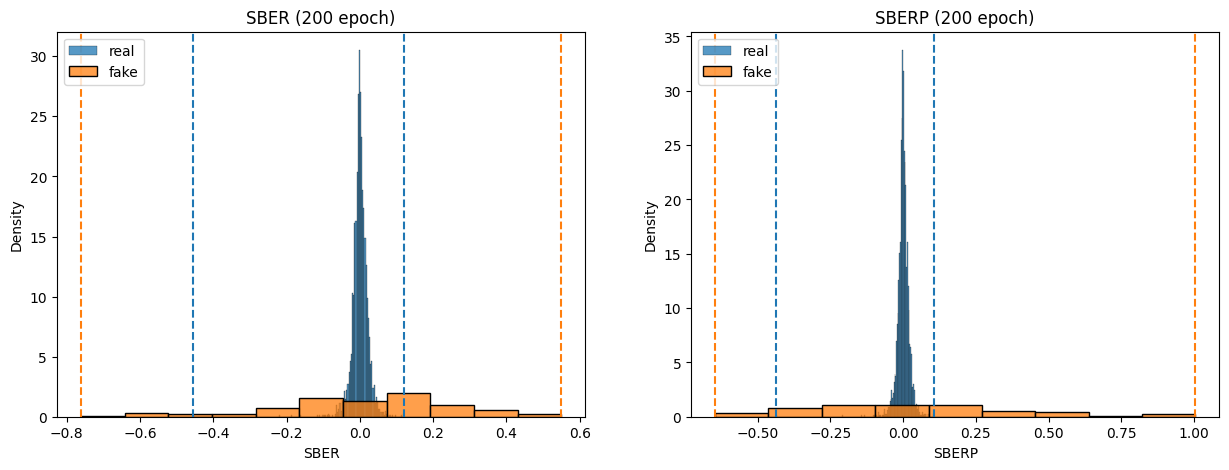

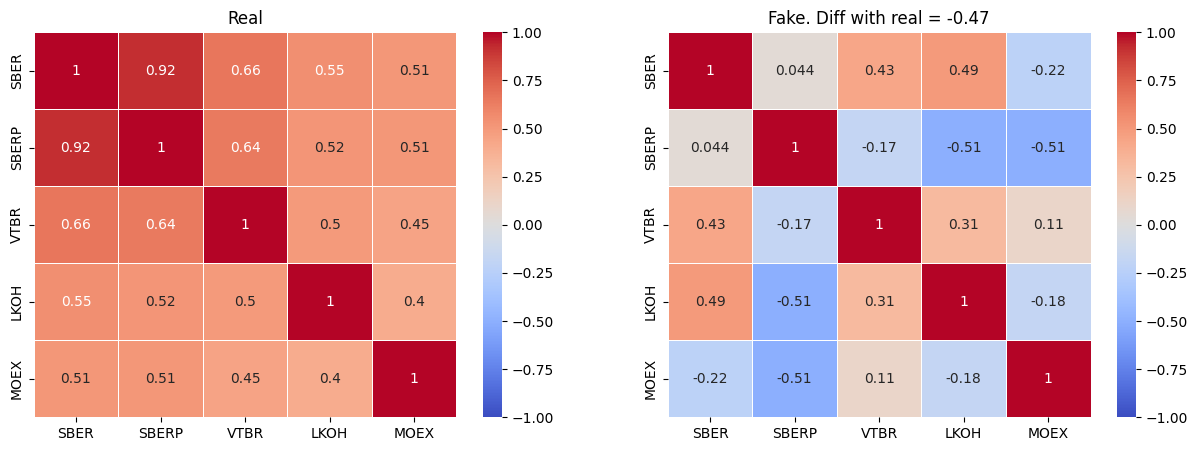

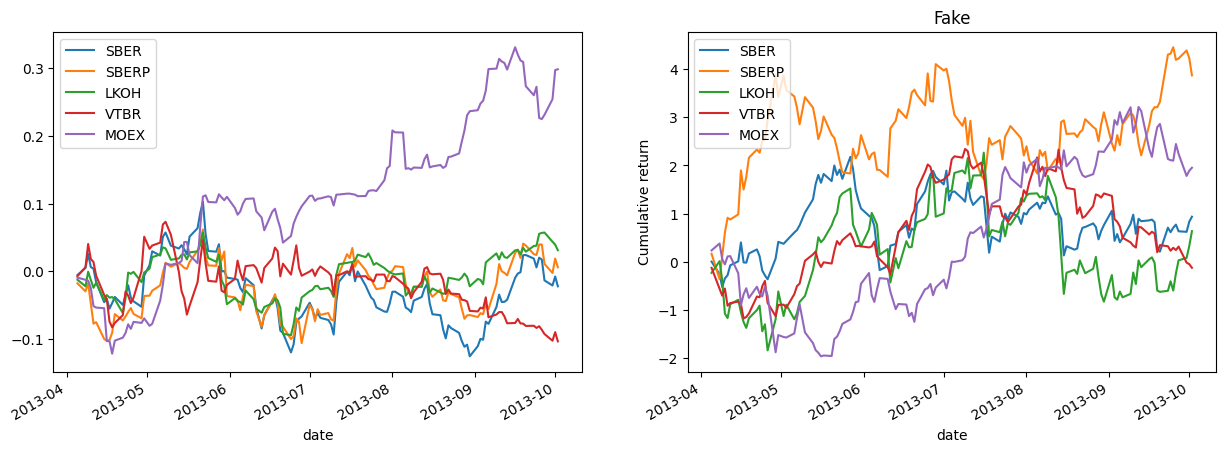

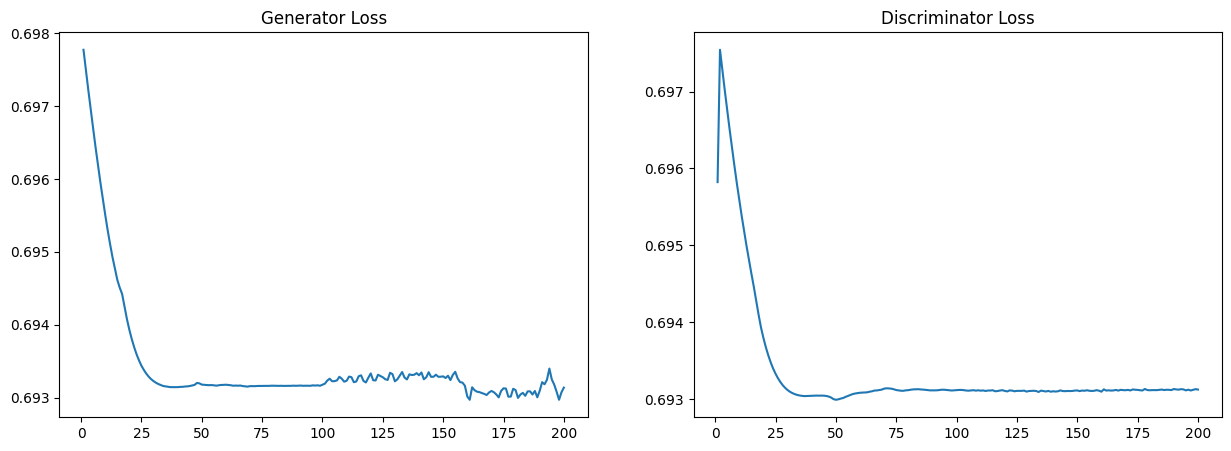

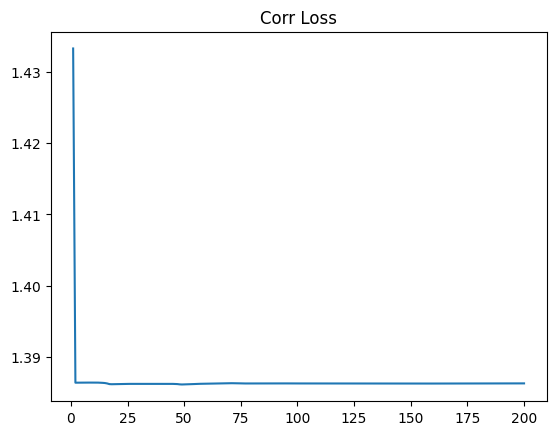

200 epochs train time: 789.3s. Estimated train time: 13.2m
tensor(-0.0214)
Fake std: [0.03709606 0.04289712 0.04155843 0.04042124 0.02729281].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.622496520135304. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


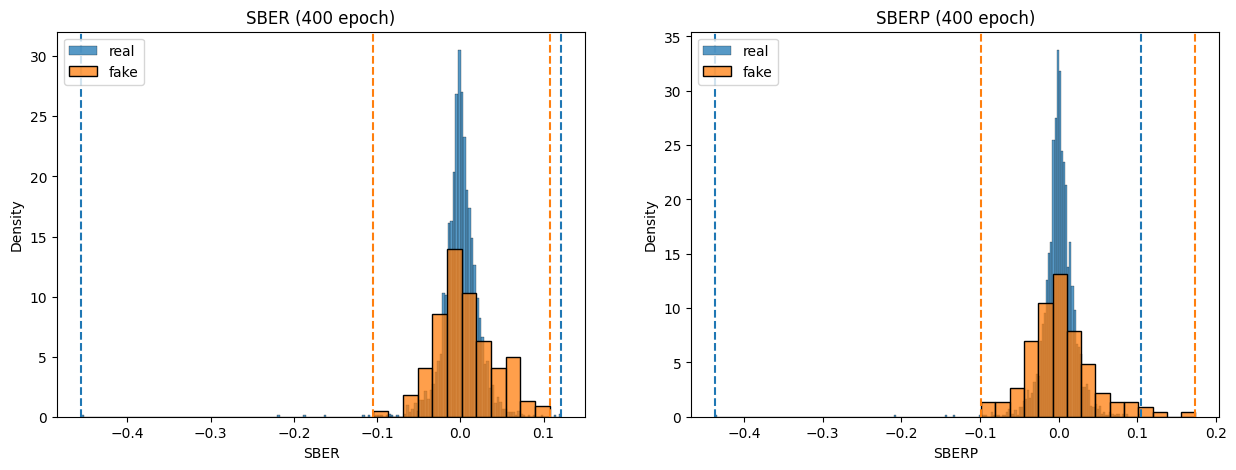

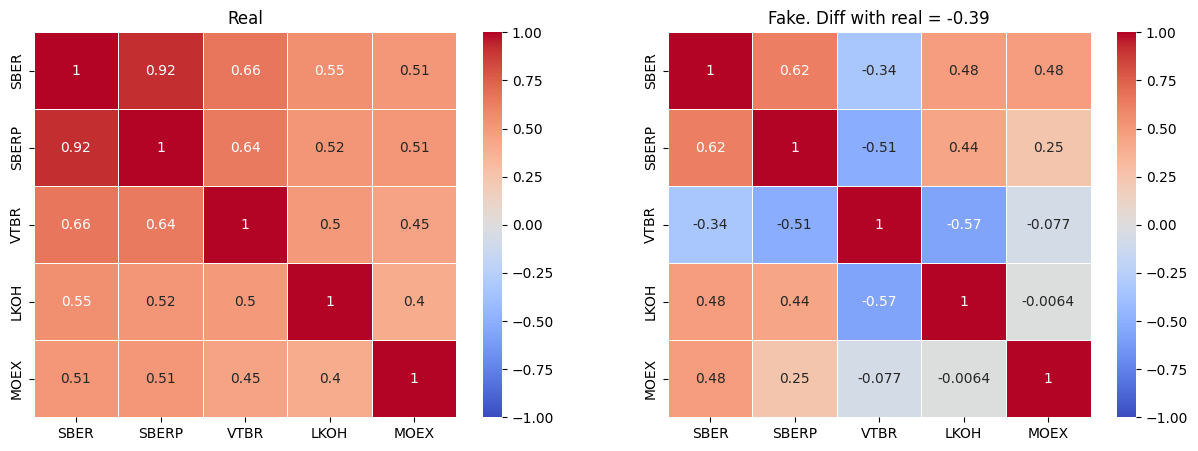

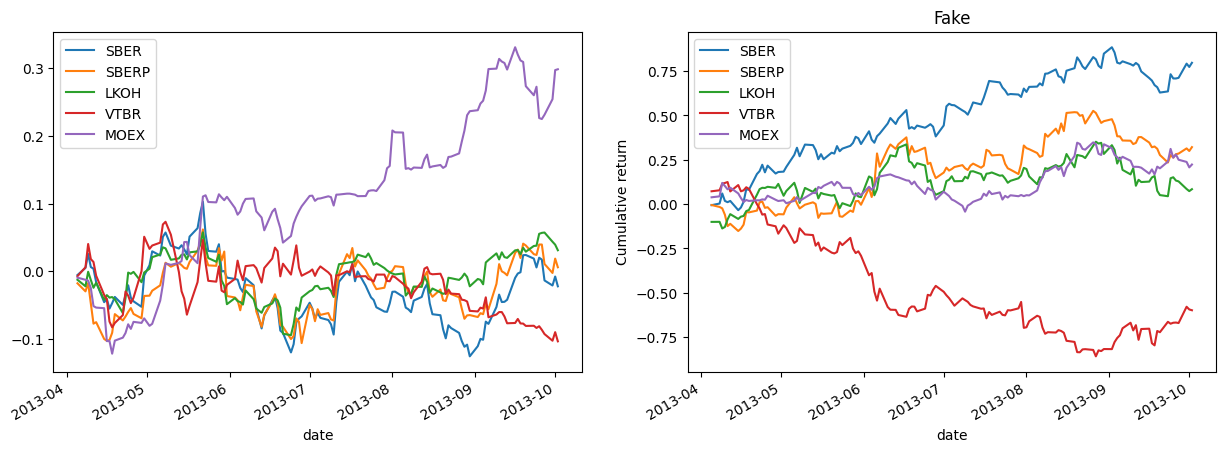

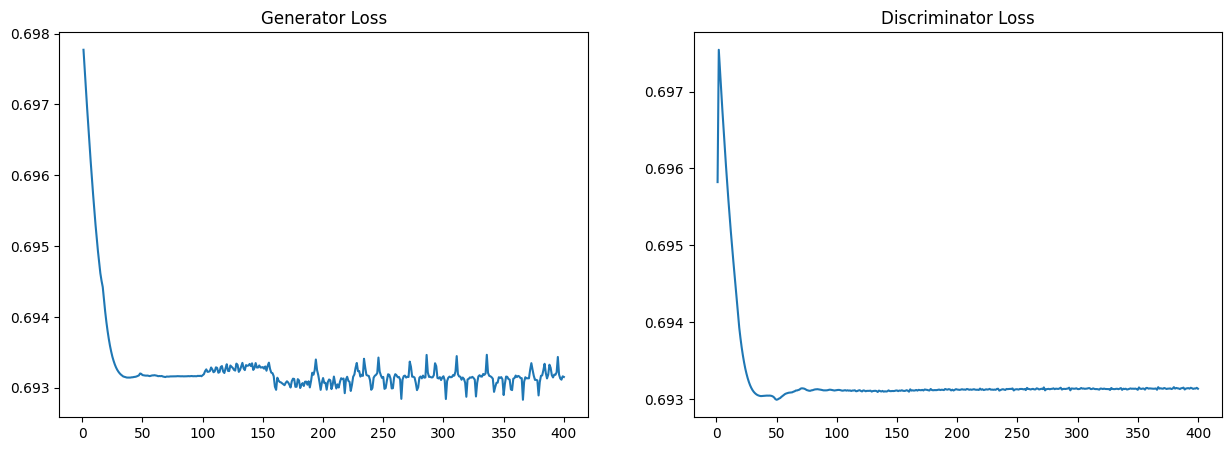

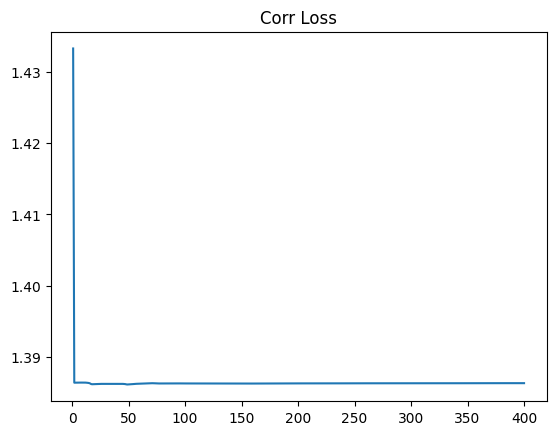

200 epochs train time: 467.2s. Estimated train time: 0.0m
tensor(0.0232)
Fake std: [0.01878536 0.01636642 0.01460415 0.01639364 0.01557493].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8441556401938781. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


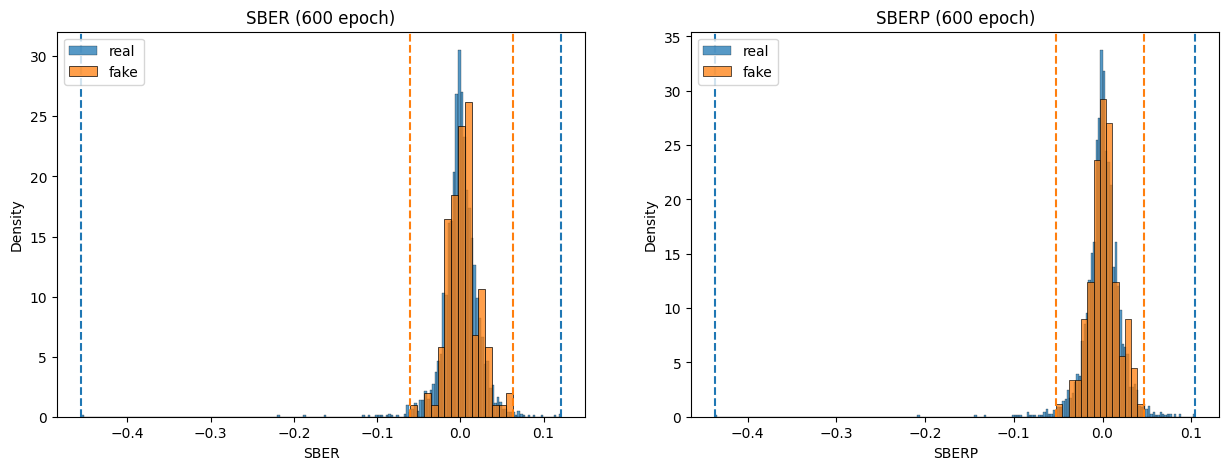

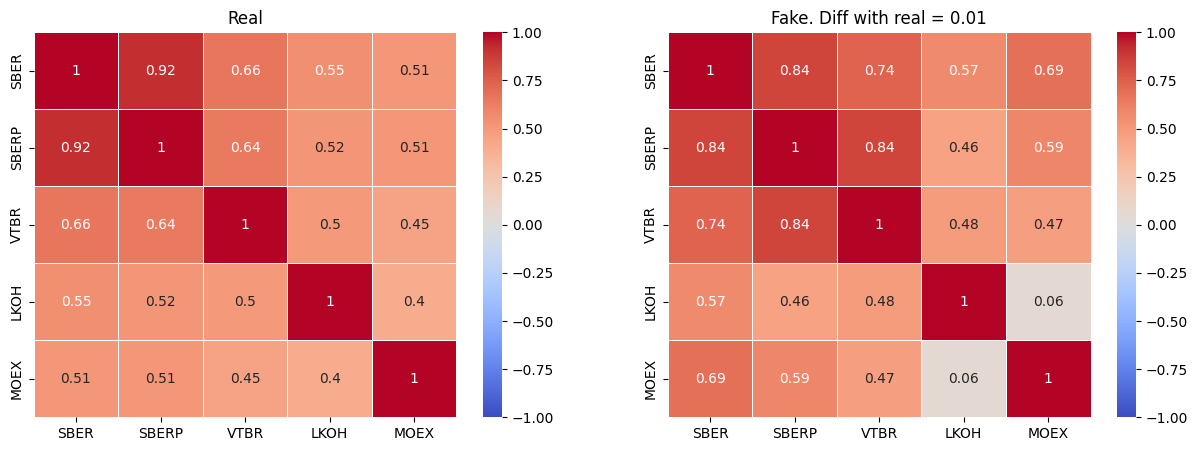

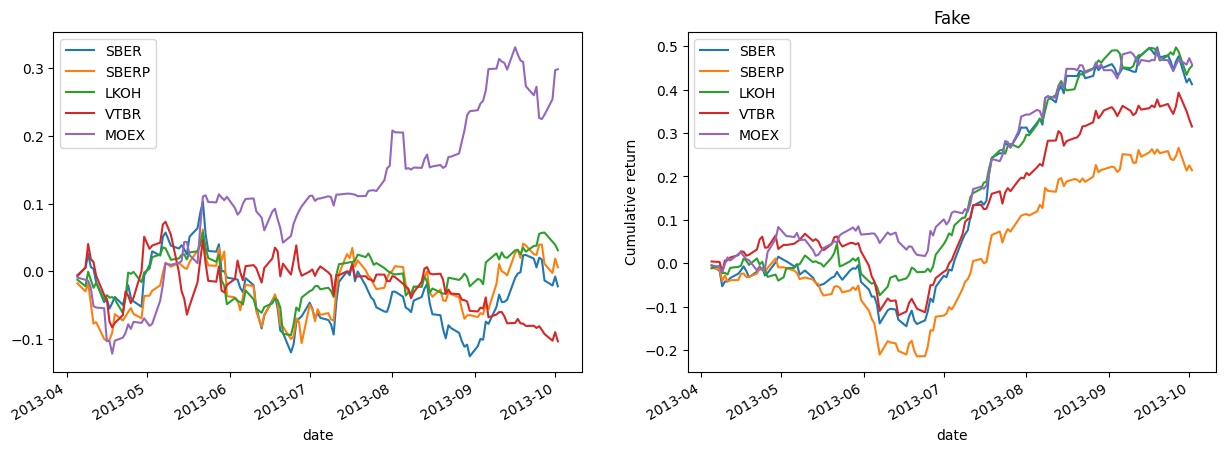

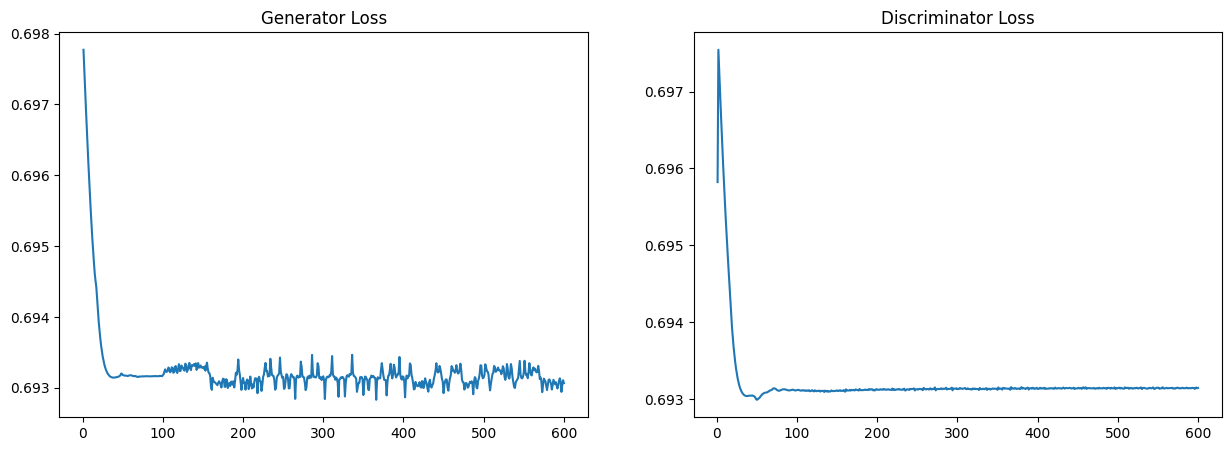

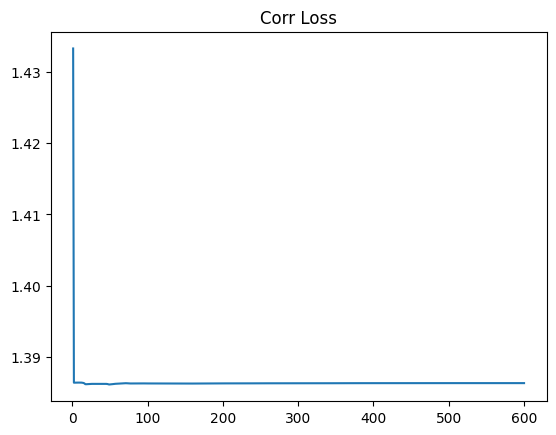

In [39]:
#TODO дискриминатор

from gan_train_loop import train_gan

N_EPOCHS = 600
LOG_FREQUENCY = 200
SAVE_FREQUENCY = 2000

torch.manual_seed(1) # фиксим рандомайзеры

for kernel_size in [2]:
    # Define generator and discriminator
    discriminator = Discriminator().to(DEVICE)
    generator = Generator(kernel_size).to(DEVICE)
    
    # Define the optimizers for generator and discriminator
    LR = 0.0002
    generator_optimizer = optim.RMSprop(generator.parameters(), lr=LR)
    discriminator_optimizer = optim.RMSprop(discriminator.parameters(), lr=LR)
    # Train GAN
    generator_losses, discriminator_losses_real, discriminator_losses_fake = train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, dataloader, df_returns_real, n_epochs=N_EPOCHS, log_frequency=LOG_FREQUENCY, save_frequency=SAVE_FREQUENCY, model_prefix='TCN')

    checkpoint = 'Убрал обучение дискриминатора (обучается первые 50 эпох )'
    all_generator_losses[checkpoint] = generator_losses
    all_discriminator_losses_real[checkpoint] = discriminator_losses_real
    all_discriminator_losses_fake[checkpoint] = discriminator_losses_fake
    
    all_generator_losses = add_to_dict('all_generator_losses', all_generator_losses)
    all_discriminator_losses_real = add_to_dict('all_discriminator_losses_real', all_discriminator_losses_real)
    all_discriminator_losses_fake = add_to_dict('all_discriminator_losses_fake', all_discriminator_losses_fake)
    


In [40]:
all_generator_losses['Дискриминатор полностью обучался'] = all_generator_losses['5. Убрад обучение дискриминатора']
all_discriminator_losses_real['Дискриминатор полностью обучался'] = all_discriminator_losses_real['5. Убрад обучение дискриминатора']
all_discriminator_losses_fake['Дискриминатор полностью обучался'] = all_discriminator_losses_fake['5. Убрад обучение дискриминатора']

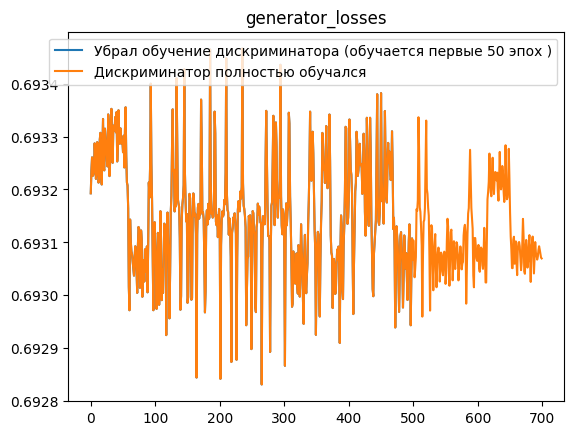

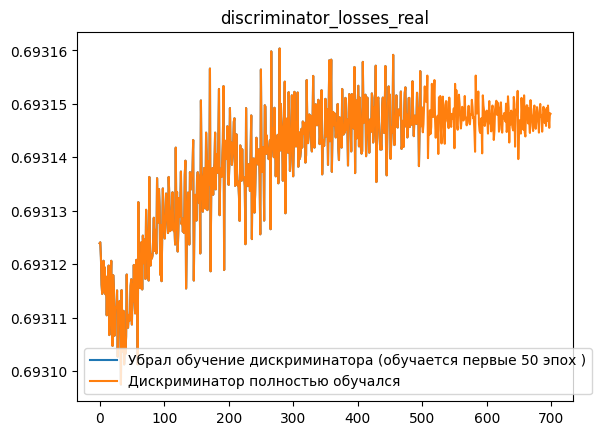

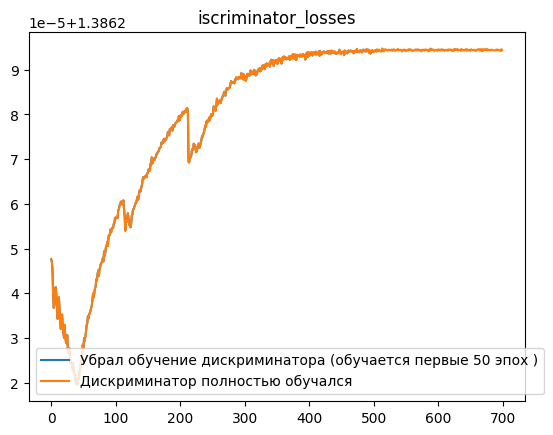

In [48]:
thresh = 11

i = 0
for key, values in all_generator_losses.items():
    if i >= thresh:
        plt.plot(values[100:], label=key)
    i += 1
i = 0
plt.title('generator_losses')
plt.legend()    
plt.show()
for key, values in all_discriminator_losses_real.items():
    if i >= thresh:
        plt.plot(values[100:], label=key)
    i += 1
i = 0
plt.title('discriminator_losses_real')
plt.legend()    
plt.show()

for key, values in all_discriminator_losses_fake.items():
    if i >= thresh:
        plt.plot(values[100:], label=key)
    i += 1
i = 0
plt.title('iscriminator_losses')
plt.legend()    
plt.show()

# Generation

## Generate random history

## Plot cumulative real and fake returns

In [8]:
# Грузим свой
from generation import generate_fake_returns
from gan_train_loop import load_gan

generator_my = Generator(2).to(DEVICE)

load_gan('TCN', generator_my, epoch=100, )
my_df_returns_fake = generate_fake_returns(generator_my, df_returns_real, seed=0)

Load 100 epoch and 2 kernek_size checkpoint
tensor(-0.0230)


In [36]:
from gan_train_loop import plot_gan
from correlations import plot_correlation_matrix
from fid import calculate_fid

tmp_df_returns_real = df_returns_real[df_returns_real.sum(axis=1) != df_returns_real.sum(axis=1).min()]

for kernel_size in [2, 3, 5, 7]:
    for epoch in range(200, 1000, 200):
        
        generator_my = Generator(kernel_size).to(DEVICE)
        
        load_gan('TCN', generator_my, epoch=epoch)
        my_df_returns_fake = generate_fake_returns(generator_my, df_returns_real, seed=0)
    
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
        plt.subplot(2, 1, 1)
        
        df_returns_real.cumsum().plot(ax=ax1)
        plt.title('Real')
        plt.ylabel('Cumulative log-returns')
        
        plt.subplot(2, 1, 2)
        my_df_returns_fake.cumsum().plot(ax=ax2)

    
        fid = calculate_fid(ori_data=df_returns_real, gen_data=my_df_returns_fake)
        plt.title(f'Fake. Epoch = {epoch}, kernel_size = {kernel_size}. Fid = {round(fid, 3)}')
        plt.ylabel('Cumulative log-returns')
        
        plt.tight_layout()
        
        plt.savefig(f'./tests/returns_tcn_{epoch}_{kernel_size}')# кол-во эпох обучения _ HIDDEN_CHANNELS
        plt.close(fig)
    
        ############
        fig, _ = plt.subplots(1, 2, figsize=(14, 5))
        
        plt.subplot(1, 2, 1)
        plot_correlation_matrix(df_returns_real.corr())
        plt.title('Real')
        
        plt.subplot(1, 2, 2)
        plot_correlation_matrix(my_df_returns_fake.corr())
        plt.title(f'Fake. Epoch = {epoch}, kernel_size = {kernel_size}. Diff with real = {round(np.mean(my_df_returns_fake.corr() - df_returns_real.corr()), 2)}. Fid = {round(fid, 3)}')
        
        plt.savefig(f'./tests/corr_matrix_tcn_{epoch}_{kernel_size}')# кол-во эпох обучения _ HIDDEN_CHANNELS
        plt.clf()
    
        ############
        for col in df_returns_real.columns:
            # Plot returns distributions
            sns.histplot(tmp_df_returns_real[col], stat='density', label='real')
            sns.histplot(my_df_returns_fake[col], stat='density', label='fake')
        
            # Plot real returns bounds
            plt.axvline(tmp_df_returns_real[col].min(), linestyle='dashed', color='C0')
            plt.axvline(tmp_df_returns_real[col].max(), linestyle='dashed', color='C0')
        
            # Plot fake returns bounds
            plt.axvline(my_df_returns_fake[col].min(), linestyle='dashed', color='C1')
            plt.axvline(my_df_returns_fake[col].max(), linestyle='dashed', color='C1')
            
            
            plt.xlabel('log-return')
            plt.legend(loc='upper left')
            plt.title(f'{col} returns distribution. Epoch = {epoch}, kernel_size = {kernel_size}')
            
            plt.savefig(f'./tests/{col}_hist_tcn_{epoch}_{kernel_size}')# кол-во эпох обучения _ HIDDEN_CHANNELS
            plt.clf()
            
    
        # plt.savefig(f'./tests/{col}_hist_tcn_{epoch}_10')# кол-во эпох обучения _ HIDDEN_CHANNELS
        # plt.clf()
    

C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 200 epoch and 2 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 400 epoch and 2 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 600 epoch and 2 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 800 epoch and 2 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 200 epoch and 3 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 400 epoch and 3 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 600 epoch and 3 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 800 epoch and 3 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 200 epoch and 5 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 400 epoch and 5 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 600 epoch and 5 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 800 epoch and 5 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 200 epoch and 7 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 400 epoch and 7 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 600 epoch and 7 kernek_size checkpoint
tensor(-0.0230)


C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Load 800 epoch and 7 kernek_size checkpoint
tensor(-0.0230)


<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

In [ ]:
from correlations import plot_correlation_matrix
from gan_train_loop import plot_gan
from generation import generate_samples, _merge_generated_dfs, _normalize_returns

torch.random.manual_seed(0)
for epoch in range(200, 2200, 200):
    
    generator_my = Generator().to(DEVICE)
    
    load_gan('TCN', generator_my, epoch=epoch)

    plot_gan(generator_my, df_returns_real.columns, [0], [0], [0], 1,  df_returns_real)
    
    # df_returns_fake = generate_samples(generator_my, df_returns_real.columns)
    
    # plt.plot(_normalize_returns(df_returns_fake, df_returns_real).cumsum())
    # plt.show()
    
    # my_df_returns_fake = generate_fake_returns(generator_my, df_returns_real, seed=0)
    # plt.plot(my_df_returns_fake[:WINDOW_SIZE].cumsum())
    
    # plt.show()
    

    


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

plt.subplot(2, 1, 1)

df_returns_real.cumsum().plot(ax=ax1)
plt.title('Real')
plt.ylabel('Cumulative log-returns')

plt.subplot(2, 1, 2)
my_df_returns_fake.cumsum().plot(ax=ax2)
plt.title('Fake my')
plt.ylabel('Cumulative log-returns')

plt.tight_layout()

plt.show()

## Plot correlation matrix for real and fake returns

In [ ]:
from correlations import plot_correlation_matrix

plt.subplots(1, 2, figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_correlation_matrix(df_returns_real.corr())
plt.title('Real')

plt.subplot(1, 2, 2)
plot_correlation_matrix(my_df_returns_fake.corr())
plt.title('Fake')

plt.show()

# Plot returns distribution

In [ ]:
tmp_df_returns_real = df_returns_real[df_returns_real.sum(axis=1) != df_returns_real.sum(axis=1).min()]

for col in df_returns_real.columns:
    # Plot returns distributions
    sns.histplot(tmp_df_returns_real[col], stat='density', label='real')
    sns.histplot(my_df_returns_fake[col], stat='density', label='fake')

    # Plot real returns bounds
    plt.axvline(tmp_df_returns_real[col].min(), linestyle='dashed', color='C0')
    plt.axvline(tmp_df_returns_real[col].max(), linestyle='dashed', color='C0')

    # Plot fake returns bounds
    plt.axvline(my_df_returns_fake[col].min(), linestyle='dashed', color='C1')
    plt.axvline(my_df_returns_fake[col].max(), linestyle='dashed', color='C1')

    plt.xlabel('log-return')
    plt.legend(loc='upper left')
    plt.title(f'{col} returns distribution')
    plt.show()